# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Meo, Mr. Alfonzo",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
# TODO
titanic.isna()

titanic.isna().sum(axis = 1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# TODO
# titanic['Embarked'].mode() gives us S 
titanic['Age'] = titanic['Age'].replace(np.nan, 29.699118)
titanic['Cabin'] = titanic['Cabin'].replace(np.nan, 'other')
titanic['Embarked'] = titanic['Embarked'].replace(np.nan, 'S')



### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# TODO
new = titanic.sort_values(by='Fare', ascending=False)
#16th row
new.iloc[15]
#Name is Mr. John Farthing


PassengerId                   528
Survived                        0
Pclass                          1
Name           Farthing, Mr. John
Sex                          male
Age                       29.6991
SibSp                           0
Parch                           0
Ticket                   PC 17483
Fare                      221.779
Cabin                         C95
Embarked                        S
Name: 527, dtype: object

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# TODO
titanic2 = titanic.loc[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]
sortedt2 = titanic2.sort_values(by='Fare', ascending=False)
sortedt2.head()
sortedt2.iloc[5]
#Her name is Mrs. James (Helene DeLaudeniere Chaput) Baxter

PassengerId                                                300
Survived                                                     1
Pclass                                                       1
Name           Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Sex                                                     female
Age                                                         50
SibSp                                                        0
Parch                                                        1
Ticket                                                PC 17558
Fare                                                   247.521
Cabin                                                  B58 B60
Embarked                                                     C
Name: 299, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
# TODO
pd.pivot_table(titanic, index=["Sex", "Pclass"])

#Findings:
#Females are much more likely to have survived than males. 
#In females, the highest jump in survival rate is from 3rd to 2nd class.
#In males, the highest jump in survival rate is from 2nd to 1st class. 
#Age goes up as class goes up in both genders. 



Age        Fare     Parch  PassengerId     SibSp  Survived
Sex    Pclass                                                                  
female 1       34.141405  106.125798  0.457447   469.212766  0.553191  0.968085
       2       28.748661   21.970121  0.605263   443.105263  0.486842  0.921053
       3       24.068493   16.118810  0.798611   399.729167  0.895833  0.500000
male   1       39.287717   67.226127  0.278689   455.729508  0.311475  0.368852
       2       30.653908   19.741782  0.222222   447.962963  0.342593  0.157407
       3       27.372153   12.661633  0.224784   455.515850  0.498559  0.135447

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

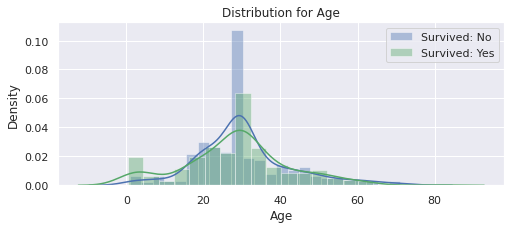

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

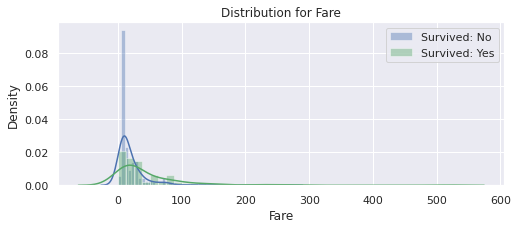

In [ ]:
def distplot(feature, frame):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()

numerical_cols = ['Age', 'Fare']

display(titanic['Age'].describe())
distplot('Age', titanic)
#For age, you had the least chance of surviving if you were middle aged (around 30 years old).
#Infants look like they had a the best chance of surviving. 
#Next are people younger than 20 or older than 40.

display(titanic['Fare'].describe())
distplot('Fare', titanic)
#For fare, definitely the cheaper fares had a worse chance in surviving. 



### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [ ]:
# TODO
#Survival rate for SibSp
pd.pivot_table(titanic, index=["SibSp"])


,Age,Fare,Parch,PassengerId,Pclass,Survived
SibSp,,,,,,
0,31.014851,25.692028,0.185855,455.370066,2.351974,0.345395
1,30.041134,44.147370,0.655502,439.727273,2.057416,0.535885
2,23.378477,51.753718,0.642857,412.428571,2.357143,0.464286
3,17.862279,68.908862,1.312500,321.562500,2.562500,0.250000
4,7.055556,31.855556,1.500000,381.611111,3.000000,0.166667
5,10.200000,46.900000,2.000000,336.800000,3.000000,0.000000
8,29.699118,69.550000,2.000000,481.714286,3.000000,0.000000


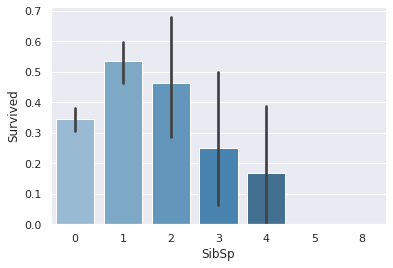

In [ ]:
#Visualization for SibSp
sns.barplot(x = "SibSp", y="Survived", palette = "Blues_d", data=titanic)


In [ ]:
#Survival rate for Parch
pd.pivot_table(titanic, index=["Parch"])


,Age,Fare,PassengerId,Pclass,SibSp,Survived
Parch,,,,,,
0,31.604368,25.586774,445.255162,2.321534,0.237463,0.343658
1,24.779771,46.778180,465.110169,2.203390,1.084746,0.550847
2,19.089243,64.337604,416.662500,2.275000,2.062500,0.500000
3,33.200000,25.951660,579.200000,2.600000,1.000000,0.600000
4,44.500000,84.968750,384.000000,2.500000,0.750000,0.000000
5,39.200000,32.550000,435.200000,3.000000,0.600000,0.200000
6,43.000000,46.900000,679.000000,3.000000,1.000000,0.000000


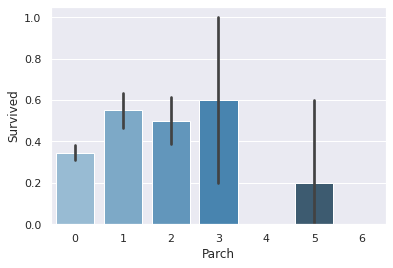

In [ ]:
#Visualization for Parch
sns.barplot(x = "Parch", y="Survived", palette = "Blues_d", data=titanic)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
Pclass,1.000000,0.118133,0.171190,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168091,0.247845
Sex,0.118133,1.000000,0.005005,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.116569,0.543351
Age,0.171190,0.005005,1.000000,0.010067,0.132659,0.074814,0.117313,0.163002,-0.133308,0.037025
SibSp,-0.149630,-0.046152,0.010067,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030683,-0.136302
Parch,-0.000343,0.242417,0.132659,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.085059,0.086210
Ticket,0.020431,-0.132709,0.074814,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.024655,-0.047298
Fare,0.079498,0.137725,0.117313,-0.046556,0.074306,0.303257,1.000000,0.379659,0.076726,0.191981
Cabin,0.187437,0.082104,0.163002,-0.108709,-0.002761,0.212438,0.379659,1.000000,0.017685,0.270495
Embarked,-0.168091,0.116569,-0.133308,-0.030683,-0.085059,-0.024655,0.076726,0.017685,1.000000,0.106811
Survived,0.247845,0.543351,0.037025,-0.136302,0.086210,-0.047298,0.191981,0.270495,0.106811,1.000000


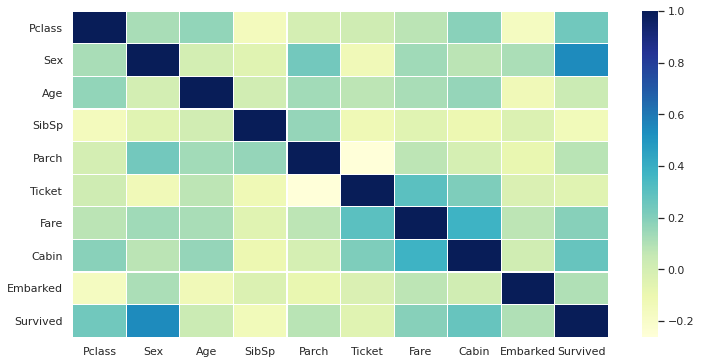

In [ ]:
# TODO
plt.figure(figsize=(12, 6))
corr = titanic[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Survived']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

#Just by looking at the Survived column of correlations Sex, Pclass, Cabin, and Fare 
#had the most effect on survival rate. Things such as age may have more of a correlation 
#with survival rate if we do age by intervals of 10 or 20, rather than increment by 1 year. 

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

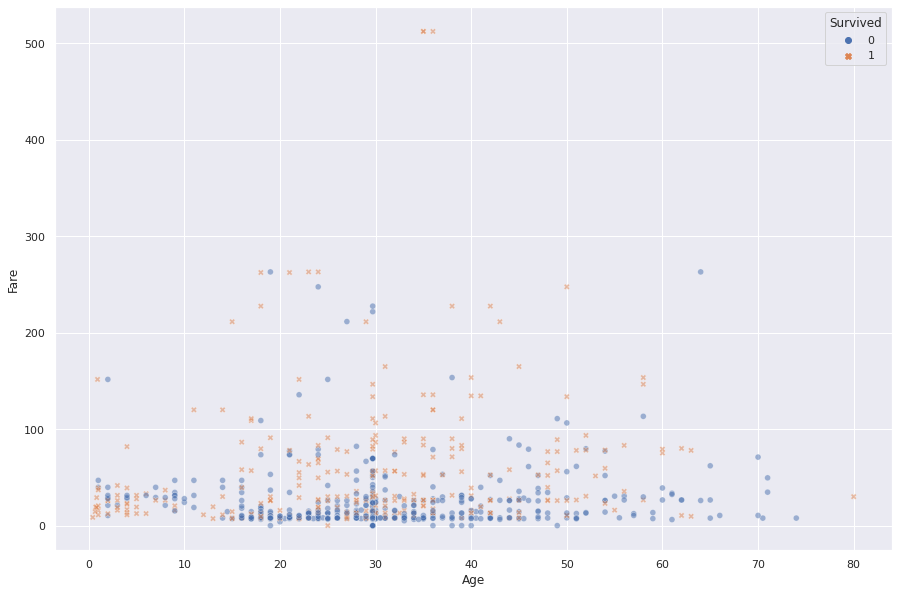

In [ ]:
# TODO
fig = plt.gcf()
fig.set_size_inches(15, 10)
ax = sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Survived', alpha=0.5, data=titanic)

#At the lower fares (less than 100), the only people who had a good chance of surviving 
#were people who were younger than 10 years old. After a fare of above 200, most people had a
#good chance at surviving, regardless of age. 

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [ ]:
# TODO
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


train_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
train_x = titanic.loc[:,[ 'Pclass' ,'Age','SibSp','Parch' ,'Fare'  ]]
train_y = titanic.loc[:,'Survived']

# model initialization
logistic_regression_model = LogisticRegression()

# train the model
logistic_regression_model.fit(train_x, train_y)

# print model parameters
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))

#  TODO: use the RL model and make predictions on the training data as well as the test data

train_z = logistic_regression_model.predict(train_x)

print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))

test_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
test_data['Age'] = test_data['Age'].replace(np.nan, 29.699118)
test_data['Pclass'] = test_data['Pclass'].replace(np.nan, 2)
test_data['SibSp'] = test_data['SibSp'].replace(np.nan, 0)
test_data['Parch'] = test_data['Parch'].replace(np.nan, 0)
test_data['Fare'] = test_data['Fare'].replace(np.nan, 0)
x_test = test_data.loc[:,[ 'Pclass' ,'Age','SibSp','Parch' ,'Fare']]


predictions = logistic_regression_model.predict(x_test)
pred_id = test_data.loc[:,['PassengerId']]
pred_id['Survived'] = predictions
pred_id
pred_id.to_csv("submission.csv", index=False)

#scored as 0.67224 on kaggle 
# Gender is a good predictor to use, but I do not know how to make it into 
# a binary variable instead of male and female. I believe using gender in 
# the model will improve its accuracy. 
 


Slope: [[-0.92077356 -0.03803372 -0.23719669  0.21345782  0.00476993]]
Intercept: [2.62043936]
model accuracy on train set: 0.7048260381593715


In [ ]:
#Attempt 2 - using gender as a predictor

train_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
titanic.Sex[titanic.Sex == 'male'] = 1
titanic.Sex[titanic.Sex == 'female'] = 0
train_x = titanic.loc[:,['Sex','Pclass' ,'Age','SibSp','Parch' ,'Fare'  ]]
train_y = titanic.loc[:,'Survived']

# model initialization
logistic_regression_model = LogisticRegression()

# train the model
logistic_regression_model.fit(train_x, train_y)

# print model parameters
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))

#  TODO: use the RL model and make predictions on the training data as well as the test data

train_z = logistic_regression_model.predict(train_x)

print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))

test_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')
test_data['Age'] = test_data['Age'].replace(np.nan, 29.699118)
test_data['Pclass'] = test_data['Pclass'].replace(np.nan, 2)
test_data['SibSp'] = test_data['SibSp'].replace(np.nan, 0)
test_data['Parch'] = test_data['Parch'].replace(np.nan, 0)
test_data['Fare'] = test_data['Fare'].replace(np.nan, 0)
test_data.Sex[test_data.Sex == 'male'] = 1
test_data.Sex[test_data.Sex == 'female'] = 0
x_test = test_data.loc[:,['Sex', 'Pclass' ,'Age','SibSp','Parch' ,'Fare']]


predictions = logistic_regression_model.predict(x_test)
pred_id = test_data.loc[:,['PassengerId']]
pred_id['Survived'] = predictions
pred_id
pred_id.to_csv("submission2.csv", index=False)

#This time around I get a score of 0.75598 on Kaggle. I am sure with enough trial and error
#I could achieve a score of 1.000. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

Slope: [[-2.65206    -1.04837472 -0.03880413 -0.33869236 -0.10099617  0.00301815]]
Intercept: [4.77202075]
model accuracy on train set: 0.797979797979798
